In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
trans_data= pd.read_csv('QVI_transaction_data.csv')

In [ ]:
trans_data.shape

(264836, 8)

In [ ]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
trans_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
pb_data= pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
pb_data.shape

(72637, 3)

In [ ]:
pb_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
pb_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
#checking for null values...

In [ ]:
trans_data.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [ ]:
pb_data.isnull().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [32]:
#check for duplicates

In [34]:
trans_data.duplicated().sum()

1

In [36]:
T_data= trans_data.drop_duplicates()

In [ ]:
#Checking and removing Outliers...

In [37]:
merged_data= pd.merge(pb_data, T_data, on= 'LYLTY_CARD_NBR', how= 'right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [38]:
print(len(merged_data))
print(len(T_data))

264835
264835


In [39]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264835 non-null  int64  
 1   LIFESTAGE         264835 non-null  object 
 2   PREMIUM_CUSTOMER  264835 non-null  object 
 3   DATE              264835 non-null  object 
 4   STORE_NBR         264835 non-null  int64  
 5   TXN_ID            264835 non-null  int64  
 6   PROD_NBR          264835 non-null  int64  
 7   PROD_NAME         264835 non-null  object 
 8   PROD_QTY          264835 non-null  int64  
 9   TOT_SALES         264835 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 22.2+ MB


DATE column should be in date time format

In [40]:
merged_data.DATE= pd.to_datetime(merged_data.DATE)

In [41]:
print(merged_data.DATE.dtype)

datetime64[ns]


In [42]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [22]:
# checking the product name column to make sure all items are chips

In [43]:
merged_data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [44]:

split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()

# Now split_prods contains the PROD_NAME column split into lists of words after removing grams and non-alphanumeric characters


<ipython-input-44-35340d991680>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()


In [45]:
from collections import Counter

# Flatten the list of lists into a single list of words
all_words = [word for sublist in split_prods for word in sublist]

# Use Counter to count occurrences of each word
word_counts = Counter(all_words)

# Convert word_counts dictionary to a Series and sort the values in descending order
word_counts_series = pd.Series(word_counts).sort_values(ascending=False)

# Print the sorted word counts
print(word_counts_series)

Chips       49770
Kettle      41288
Smiths      28859
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


In [46]:
print(merged_data.describe(), '\n')

print(merged_data.info())

       LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648350e+05  264835.000000  2.648350e+05  264835.000000   
mean     1.355496e+05     135.080216  1.351584e+05      56.583201   
std      8.058011e+04      76.784306  7.813316e+04      32.826692   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.002100e+04      70.000000  6.760100e+04      28.000000   
50%      1.303580e+05     130.000000  1.351380e+05      56.000000   
75%      2.030945e+05     203.000000  2.027015e+05      85.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264835.000000  264835.000000  
mean        1.907308       7.304205  
std         0.643655       3.083231  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000   

<class 'pandas.core.frame.DataFram

In [47]:
merged_data.PROD_QTY.value_counts(bins=4).sort_index()

(0.8, 50.75]       264833
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

from the binning process, we discovereed that PROD_QTY has values above 50.75 in the 4th bin

In [48]:
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
204366,223025,YOUNG FAMILIES,Mainstream,2018-08-15,223,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5
55501,164072,OLDER FAMILIES,Mainstream,2019-05-17,164,164241,36,Kettle Chilli 175g,5,27.0
69815,257208,OLDER FAMILIES,Premium,2018-08-14,257,257019,45,Smiths Thinly Cut Roast Chicken 175g,5,15.0


Two outliers of value 200 in PROD_QTY will be removed. Both entries are by the same customer and will be examined by this customer's transactions

In [49]:
merged_data = merged_data[merged_data.PROD_QTY < 6]

In [51]:
len(merged_data[merged_data['LYLTY_CARD_NBR']==226000])

0

In [52]:
merged_data.DATE.describe()

<ipython-input-52-6d2325d577a9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data.DATE.describe()


count                  264833
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

There are 364 instead of 365 unique values, meaning we have 1 missing date

In [53]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data.DATE.min(), end = merged_data.DATE.max()), name="DATE"), merged_data, on = "DATE", how = "left")

<ipython-input-54-600727bfcb10>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


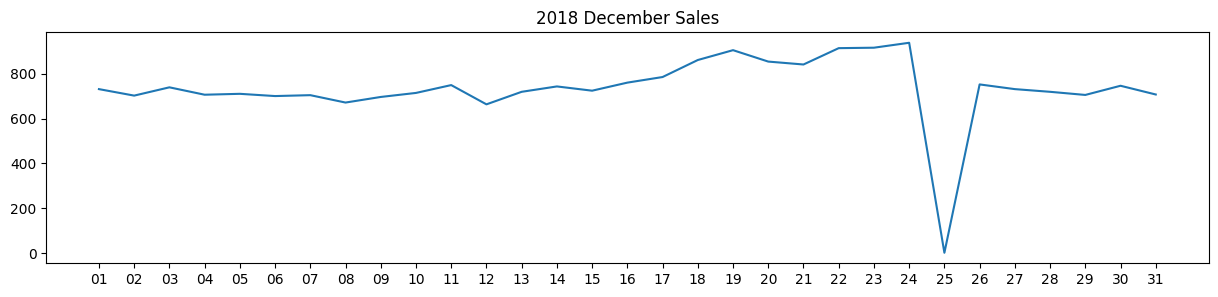

In [54]:
trans_by_date = check_null_date.DATE.value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [55]:
check_null_date.DATE.value_counts().sort_values().head()

2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
Name: DATE, dtype: int64

From what we can see above, there were no transactions on the 25th of December because the store was closed on Christmas day

Exploring Packet Sizes

<ipython-input-57-bba7d67ba5f8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data.PROD_NAME = merged_data.PROD_NAME.str.replace(r'[0-9]+(G)', 'g')


count    258769.000000
mean        182.324305
std          64.955159
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


<Axes: ylabel='Frequency'>

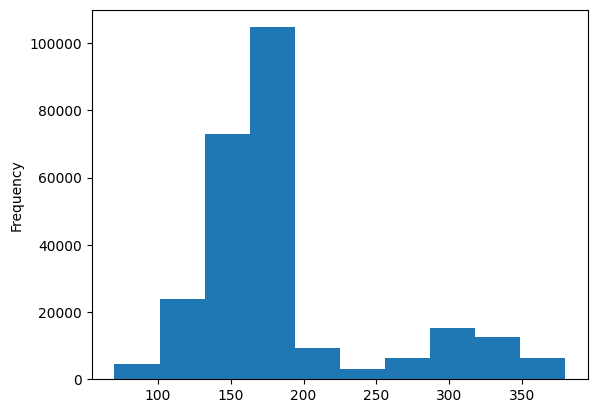

In [57]:
# Replace any instances of numbers followed by "G" with just "g" in the PROD_NAME column
merged_data.PROD_NAME = merged_data.PROD_NAME.str.replace(r'[0-9]+(G)', 'g')

# Extract pack sizes from the modified PROD_NAME column
pack_sizes = merged_data.PROD_NAME.str.extract(r'([0-9]+[gG])')[0]

# Remove "g" character from the extracted pack sizes and convert them to floating-point numbers
pack_sizes = pack_sizes.str.replace("g", "").astype("float")

# Print descriptive statistics of the pack_sizes Series
print(pack_sizes.describe())

# Plot a histogram of the pack sizes
pack_sizes.plot.hist()

In [58]:
merged_data.PROD_NAME.str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28859
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

There are several versions of the same product name. we need to correct them!

In [59]:
merged_data.PROD_NAME.str.split()[merged_data.PROD_NAME.str.split().str[0] == "Red"].value_counts()

[Red, Rock, Deli, Sp, Salt, &, Truffle, g]        1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]        1495
[Red, Rock, Deli, SR, Salsa, &, Mzzrlla, 150g]    1458
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]      1434
Name: PROD_NAME, dtype: int64

In [61]:
merged_data["Cleaned_Brand_Names"] = merged_data.PROD_NAME.str.split().str[0]

In [66]:
# Define a dictionary mapping incorrect product names to their correct versions
corrections = {
    'Burger': 'Burgers',
    'CCs': 'CCs',
    'Dorito': 'Doritos',
    'French': 'French',
    'Grain': 'Grain Waves',
    'GrnWves': 'Grain Waves',
    'Infzns': 'Infuzions',
    'NCC': 'Natural Chip Co',
    'Old': 'Old',
    'RRD': 'RRD',
    'Red': 'RRD',
    'Smith': 'Smiths',
    'Snbts': 'Sunbites',
    'Tostitos': 'Tostitos',
    'WW': 'Woolworths'
}

# Replace incorrect product names with correct versions
merged_data['PROD_NAME'].replace(corrections, inplace=True)


In [69]:
# Replace incorrect product names with correct versions
merged_data['PROD_NAME'].replace(corrections, inplace=True)

# Display corrected product names with their counts
corrected_product_counts = merged_data['PROD_NAME'].value_counts()
print(corrected_product_counts)


Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64


In [70]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Cleaned_Brand_Names
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


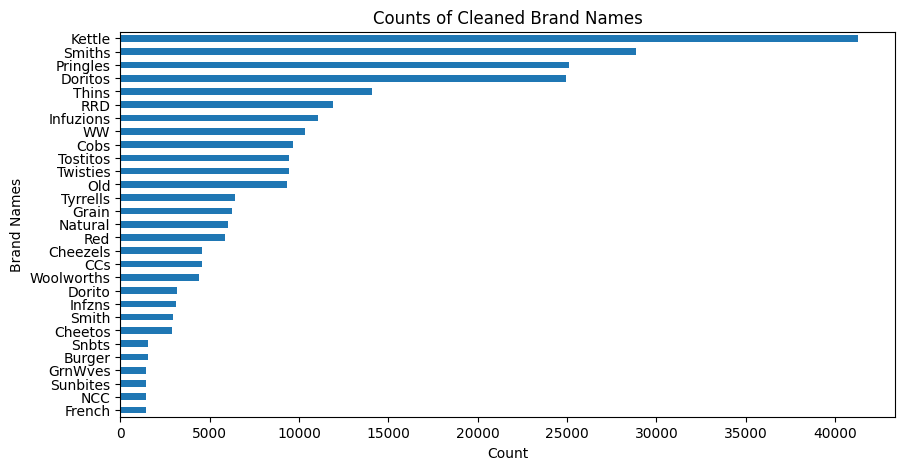

In [71]:
import matplotlib.pyplot as plt

# Assuming "Cleaned_Brand_Names" is the column containing corrected brand names
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Brand Names')
plt.title('Counts of Cleaned Brand Names')
plt.show()


In [72]:
merged_data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
Cleaned_Brand_Names    0
dtype: int64

Points to tackle;

Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

How many customers are in each segment

How many chips are bought per customer by segment

What's the average chip price by customer segment

In [73]:
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Mainstream        155677.05  7.252262
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132257.15  7.449848
RETIREES               Budget            113147.80  7.443445
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Premium            97646.05  7.456174
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655

In [75]:
grouped_sales["sum"].sum()

1933109.0000000002

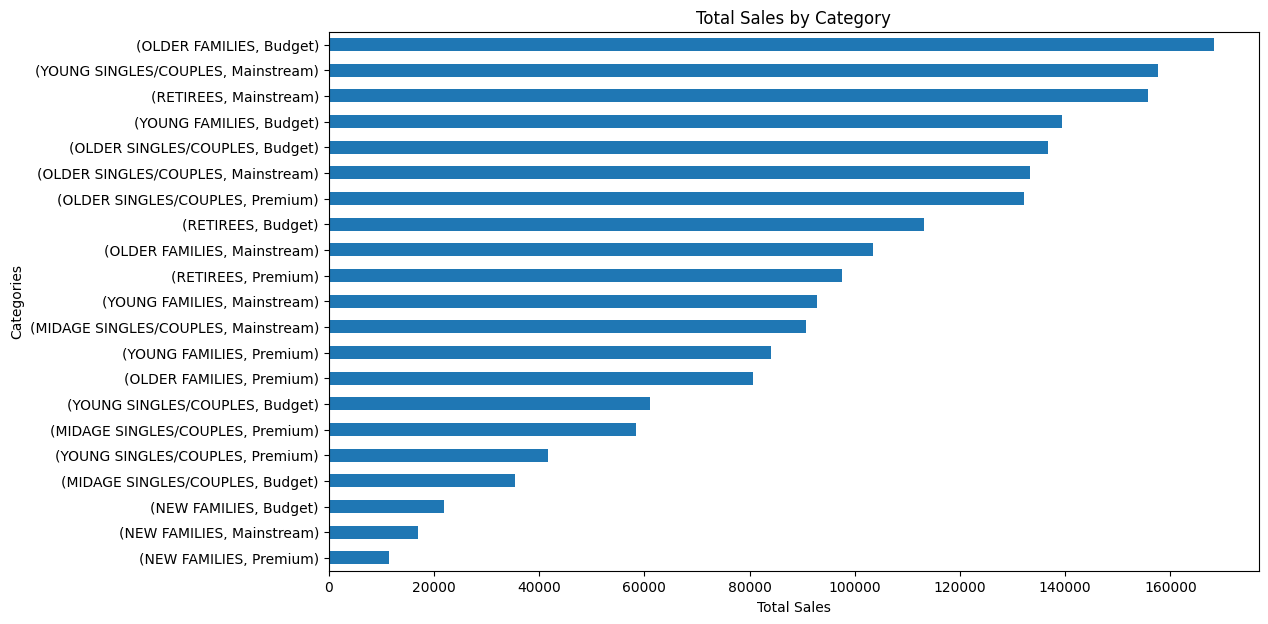

In [76]:
# Plotting the horizontal bar chart
grouped_sales["sum"].sort_values().plot.barh(figsize=(12, 7))
plt.xlabel('Total Sales')
plt.ylabel('Categories')
plt.title('Total Sales by Category')
plt.show()

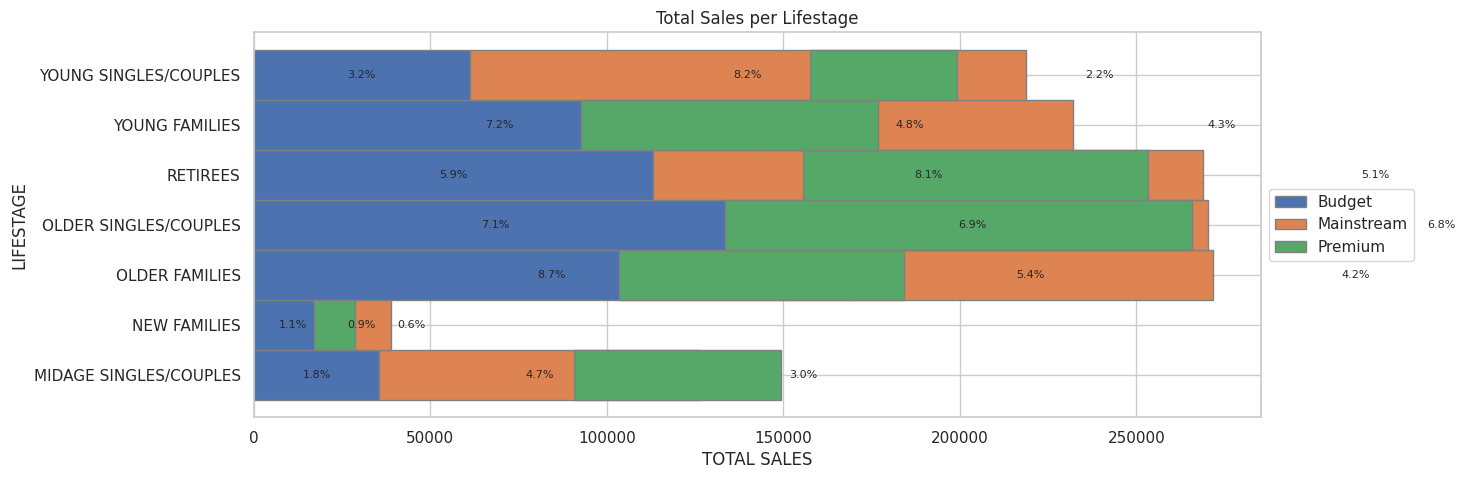

In [80]:
# Values of each group
bars1 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]

bars1_text = (bars1 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(grouped_sales["sum"])).apply("{:.1%}".format)

# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5))

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
tmp_bar = np.add(bars1, bars2)
prem_bar = plt.barh(r, bars3, left=bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)

# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [81]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


The top 3 total sales contributor segment are (in order):

Older families (Budget) $156,864

Young Singles/Couples (Mainstream) $147,582

Retirees (Premium) $145,169

In [82]:
unique_cust = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  8088
RETIREES               Mainstream                  6479
OLDER SINGLES/COUPLES  Mainstream                  4930
                       Budget                      4929
                       Premium                     4750
OLDER FAMILIES         Budget                      4675
RETIREES               Budget                      4454
YOUNG FAMILIES         Budget                      4017
RETIREES               Premium                     3872
YOUNG SINGLES/COUPLES  Budget                      3779
MIDAGE SINGLES/COUPLES Mainstream                  3340
OLDER FAMILIES         Mainstream                  2831
YOUNG FAMILIES         Mainstream                  2728
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Premium                     2433
MIDAGE SINGLES/COUPLES Premium                     2431
OLDER FAMILIES         Premium                     2273
MIDAGE SINGLES/COUPLES Budget                      1504
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588

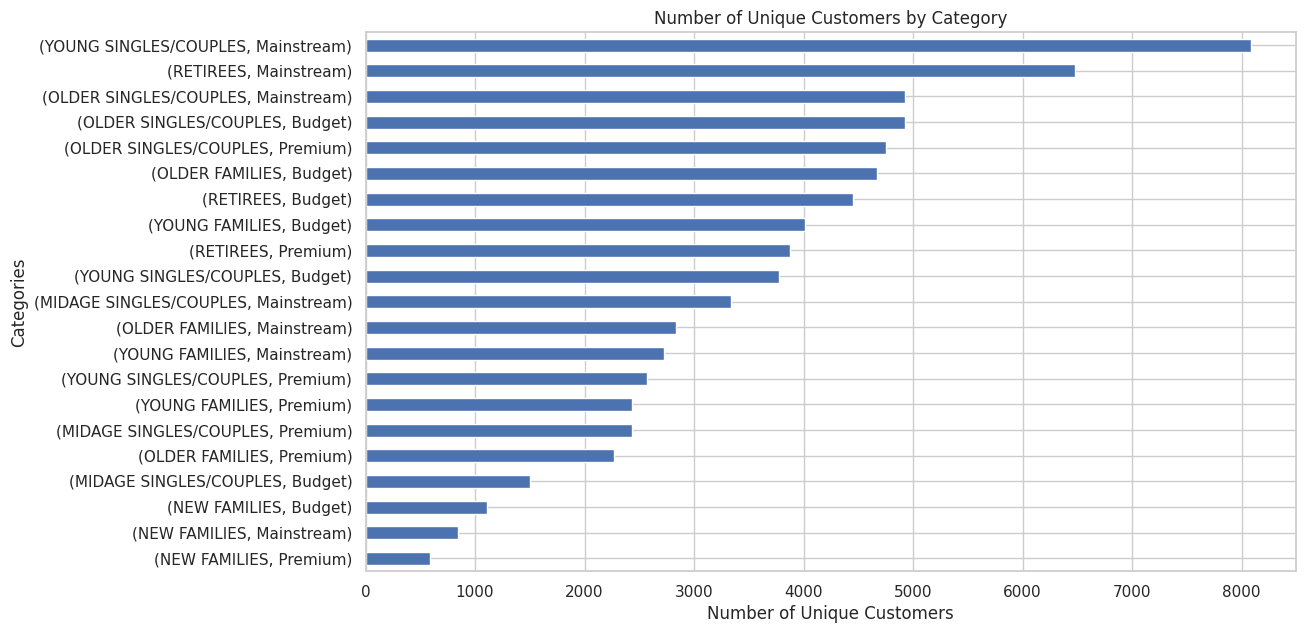

In [84]:
# Plotting the horizontal bar chart
unique_cust.sort_values().plot.barh(figsize=(12, 7))
plt.xlabel('Number of Unique Customers')
plt.ylabel('Categories')
plt.title('Number of Unique Customers by Category')
plt.show()

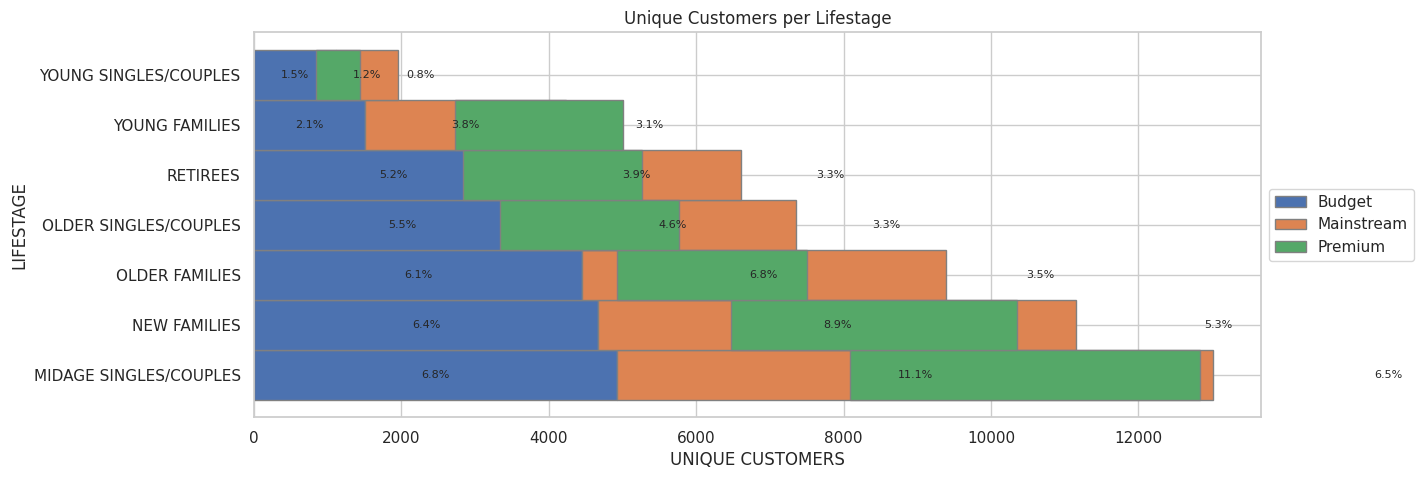

In [85]:
# Values of each group
ncust_bars1 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]

ncust_bars1_text = (ncust_bars1 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_cust)).apply("{:.1%}".format)

# # Names of group and bar width
#names = unique_cust.index.get_level_values("LIFESTAGE").unique()

# # The position of the bars on the x-axis
#r = np.arange(len(names))

plt.figure(figsize=(13,5))

# # Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# # Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# # Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=ncust_bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)

# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# # Show graphic
plt.show()

The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:

High Frequency of Purchase and, Average Sales per Customer compared to the other segment.

In [86]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        5.031438   2831
                       Budget            4.954011   4675
                       Premium           4.923009   2273
YOUNG FAMILIES         Budget            4.760269   4017
                       Premium           4.752569   2433
                       Mainstream        4.731305   2728
OLDER SINGLES/COUPLES  Premium           3.737474   4750
                       Budget            3.734429   4929
                       Mainstream        3.715619   4930
MIDAGE SINGLES/COUPLES Mainstream        3.555090   3340
RETIREES               Budget            3.412887   4454
                       Premium           3.382231   3872
MIDAGE SINGLES/COUPLES Premium           3.379679   2431
                       Budget            3.337766   1504
RETIREES               Mainstream        3.313166   6479
NEW FAMILIES           Mainstream        2.738516    849
                       Premium           2.702381    588
                       Budget            2.702338   1112
YOUNG SINGLES/COUPLES  Mainstream        2.578388   8088
                       Budget            2.445621   3779
                       Premium           2.440171   2574

The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:

High Frequency of Purchase and, Fairly high unique number of customer in the segment

In [87]:
grouped_sales.sort_values(ascending=False, by="mean")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Premium            97646.05  7.456174
OLDER SINGLES/COUPLES  Premium           132257.15  7.449848
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
NEW FAMILIES           Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Mainstream        133393.80  7.282116
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Mainstream        155677.05  7.252262
NEW FAMILIES           Premium            11491.10  7.231655
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
                       Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
                       Budget             61141.60  6.615624

Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant.

In [88]:
from scipy.stats import ttest_ind
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8542040107536954e-281


True

P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

Now, to examine what brand of chips the top 3 segments contributing to Total Sales are buying

In [89]:
merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      746
Pringles    537
Name: Cleaned_Brand_Names, dtype: int64


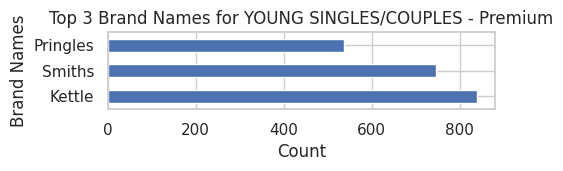

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1118
Pringles     832
Name: Cleaned_Brand_Names, dtype: int64


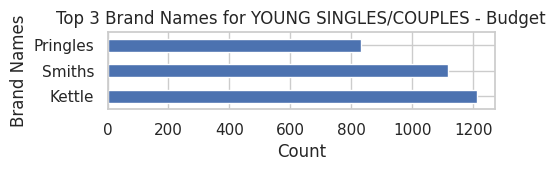

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Pringles    2315
Doritos     2238
Name: Cleaned_Brand_Names, dtype: int64


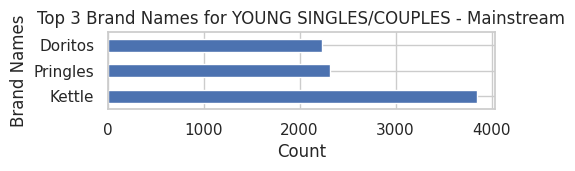

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       888
Pringles     781
Name: Cleaned_Brand_Names, dtype: int64


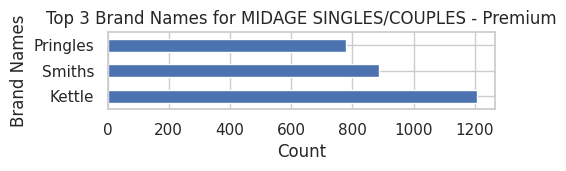

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     564
Doritos    473
Name: Cleaned_Brand_Names, dtype: int64


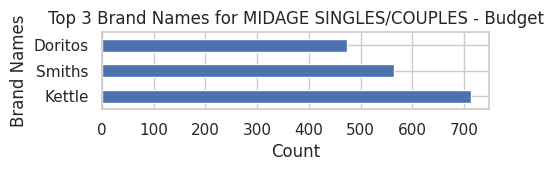

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle      2136
Smiths      1237
Pringles    1159
Name: Cleaned_Brand_Names, dtype: int64


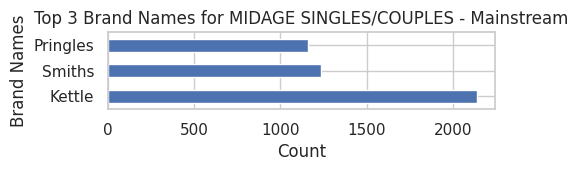

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Doritos     152
Name: Cleaned_Brand_Names, dtype: int64


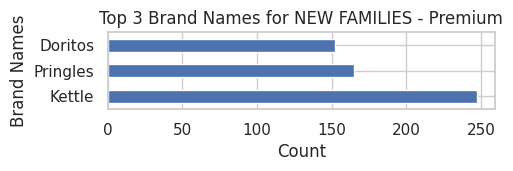

========== NEW FAMILIES - Budget ==========
Kettle      510
Pringles    309
Smiths      308
Name: Cleaned_Brand_Names, dtype: int64


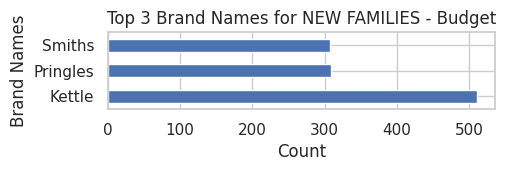

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    239
Smiths     225
Name: Cleaned_Brand_Names, dtype: int64


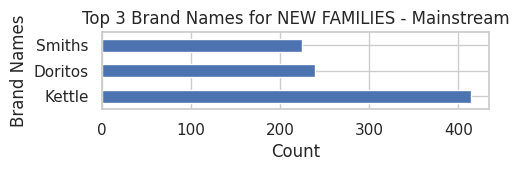

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1349
Pringles    1014
Name: Cleaned_Brand_Names, dtype: int64


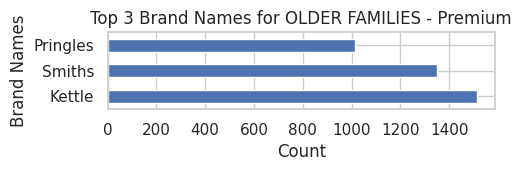

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2785
Doritos    2103
Name: Cleaned_Brand_Names, dtype: int64


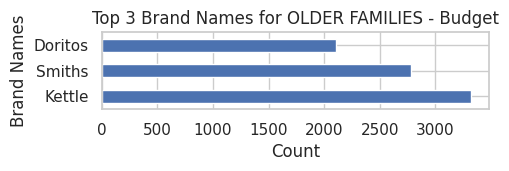

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1667
Doritos    1287
Name: Cleaned_Brand_Names, dtype: int64


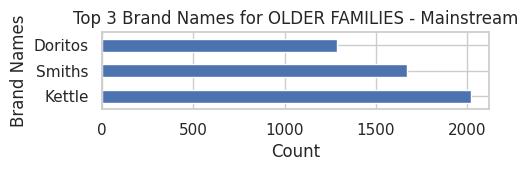

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle      2947
Smiths      1874
Pringles    1744
Name: Cleaned_Brand_Names, dtype: int64


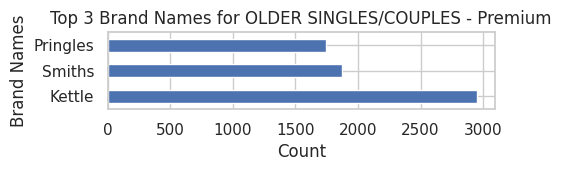

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      1914
Pringles    1843
Name: Cleaned_Brand_Names, dtype: int64


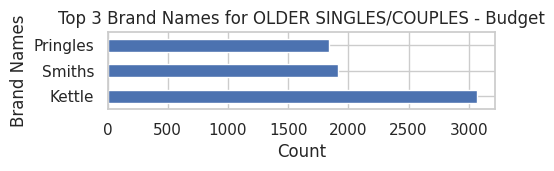

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     1974
Doritos    1776
Name: Cleaned_Brand_Names, dtype: int64


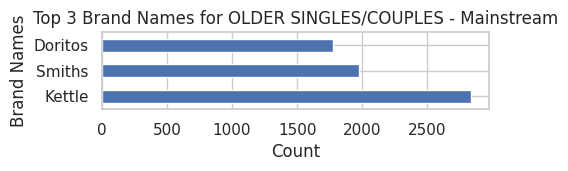

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1335
Pringles    1331
Name: Cleaned_Brand_Names, dtype: int64


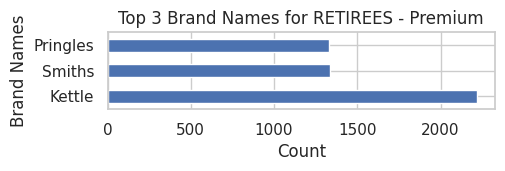

========== RETIREES - Budget ==========
Kettle     2592
Doritos    1565
Smiths     1529
Name: Cleaned_Brand_Names, dtype: int64


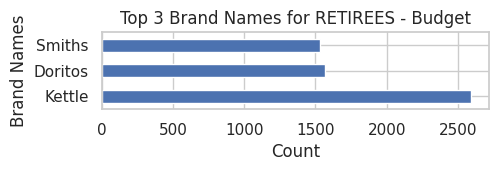

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2231
Pringles    2103
Name: Cleaned_Brand_Names, dtype: int64


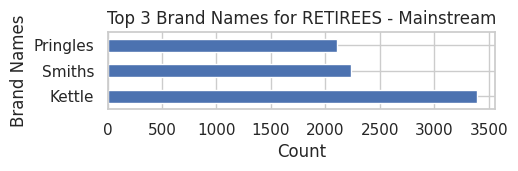

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1302
Pringles    1007
Name: Cleaned_Brand_Names, dtype: int64


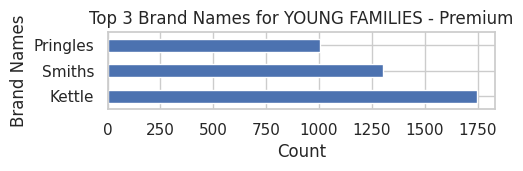

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2212
Doritos    1780
Name: Cleaned_Brand_Names, dtype: int64


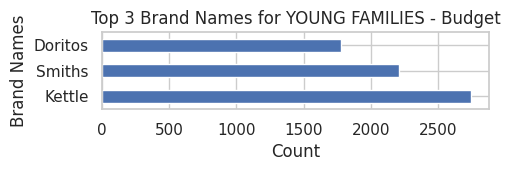

========== YOUNG FAMILIES - Mainstream ==========
Kettle     1789
Smiths     1596
Doritos    1177
Name: Cleaned_Brand_Names, dtype: int64


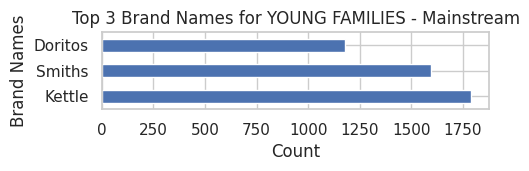

In [90]:
# Iterate over unique combinations of "LIFESTAGE" and "PREMIUM_CUSTOMER"
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========', stage, '-', prem, '==========')

        # Filter the data for the current combination
        filtered_data = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]

        # Calculate the top 3 most common brand names
        summary = filtered_data["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)

        # Plot a horizontal bar chart for the summary
        plt.figure()
        summary.plot.barh(figsize=(5, 1))
        plt.title(f'Top 3 Brand Names for {stage} - {prem}')
        plt.xlabel('Count')
        plt.ylabel('Brand Names')
        plt.show()

Every segment had Kettle as the most purchased brand.

Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand.

"YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand.

In [91]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

temp = merged_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)

frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(OLDER FAMILIES - Budget),(Smiths),0.087451,0.108971,0.010516,0.120250,1.103513,0.000986,1.012822,0.102793
3,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069504,0.155902,0.011573,0.166513,1.068060,0.000737,1.012731,0.068483
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067035,0.155902,0.011128,0.166000,1.064772,0.000677,1.012108,0.065203
7,(RETIREES - Mainstream),(Kettle),0.081055,0.155902,0.012785,0.157738,1.011775,0.000149,1.002180,0.012665
9,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155902,0.014515,0.184329,1.182340,0.002238,1.034851,0.167401


we can boldly conclude that Kettle is the brand of choice for most segments

In [95]:
merged_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Cleaned_Brand_Names
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     961
175.0    1587
Name: Pack_Size, dtype: int64


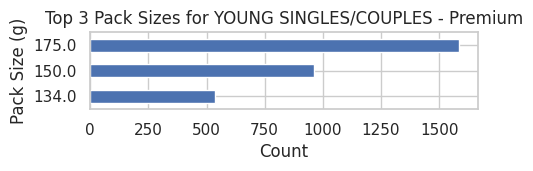

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1439
175.0    2262
Name: Pack_Size, dtype: int64


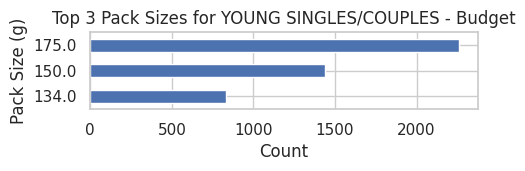

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    3159
175.0    4928
Name: Pack_Size, dtype: int64


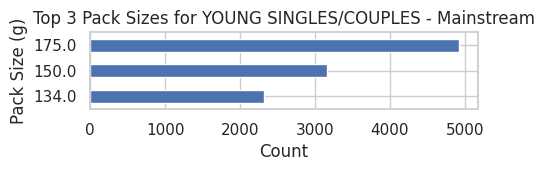

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1285
175.0    2034
Name: Pack_Size, dtype: int64


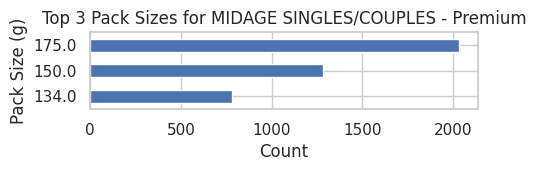

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     821
175.0    1256
Name: Pack_Size, dtype: int64


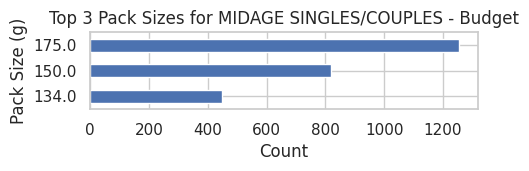

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1819
175.0    2912
Name: Pack_Size, dtype: int64


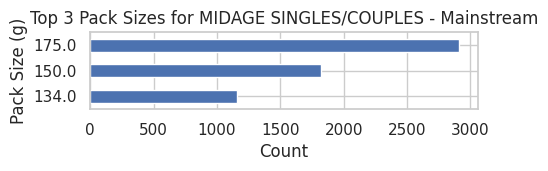

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    245
175.0    371
Name: Pack_Size, dtype: int64


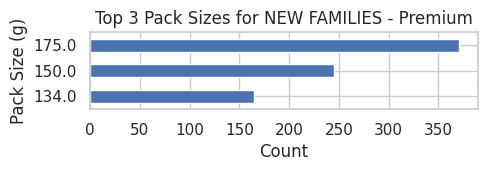

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    448
175.0    763
Name: Pack_Size, dtype: int64


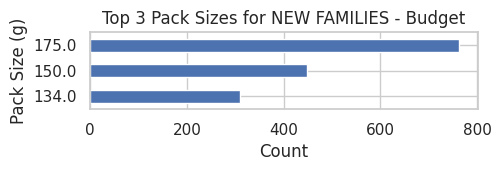

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    384
175.0    579
Name: Pack_Size, dtype: int64


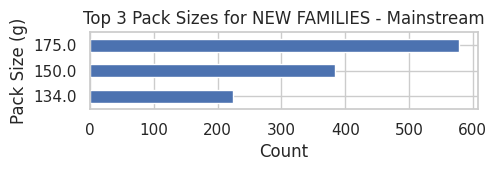

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1750
175.0    2747
Name: Pack_Size, dtype: int64


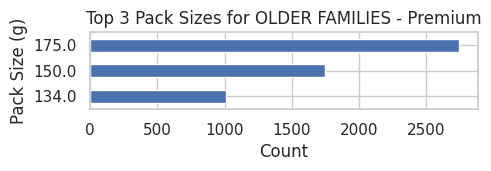

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3708
175.0    5662
Name: Pack_Size, dtype: int64


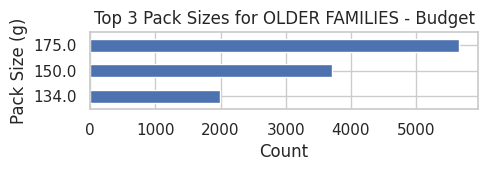

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2261
175.0    3489
Name: Pack_Size, dtype: int64


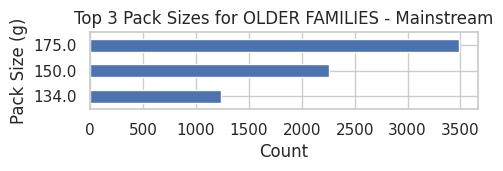

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2854
175.0    4381
Name: Pack_Size, dtype: int64


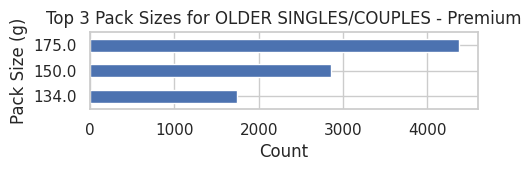

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2899
175.0    4535
Name: Pack_Size, dtype: int64


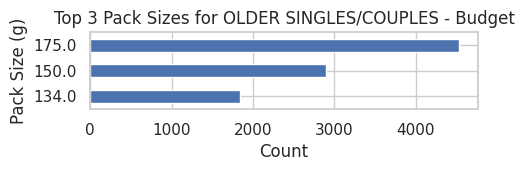

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2875
175.0    4422
Name: Pack_Size, dtype: int64


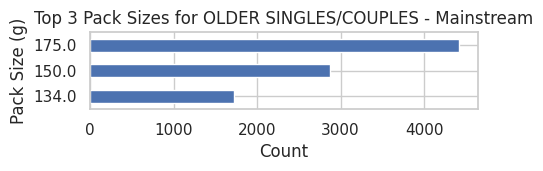

========== RETIREES - Premium ==========
134.0    1331
150.0    2015
175.0    3232
Name: Pack_Size, dtype: int64


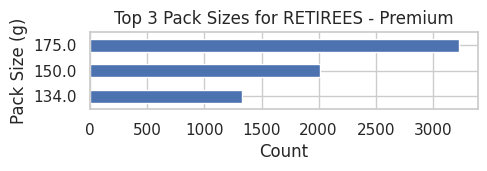

========== RETIREES - Budget ==========
134.0    1517
150.0    2381
175.0    3768
Name: Pack_Size, dtype: int64


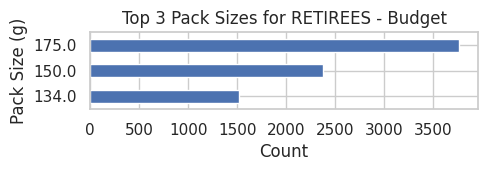

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3415
175.0    5187
Name: Pack_Size, dtype: int64


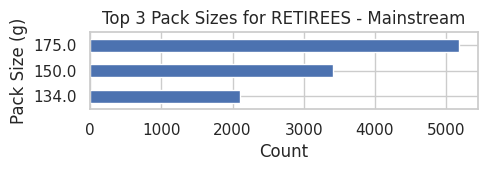

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1832
175.0    2926
Name: Pack_Size, dtype: int64


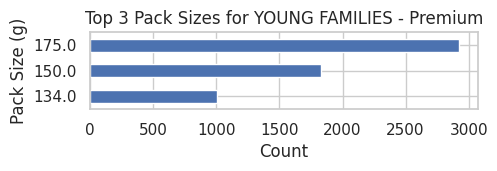

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2981
175.0    4800
Name: Pack_Size, dtype: int64


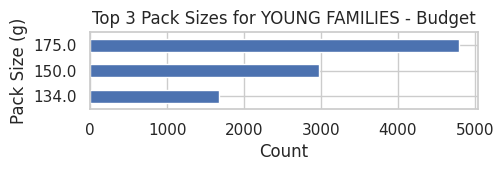

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    2101
175.0    3087
Name: Pack_Size, dtype: int64


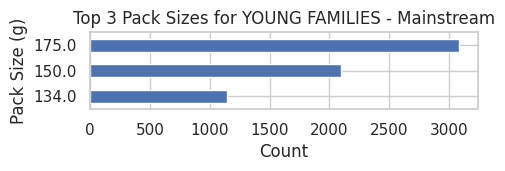

In [97]:
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

# Iterate over unique combinations of "LIFESTAGE" and "PREMIUM_CUSTOMER"
for stage in merged_pack["LIFESTAGE"].unique():
    for prem in merged_pack["PREMIUM_CUSTOMER"].unique():
        print('==========', stage, '-', prem, '==========')

        # Filter the data for the current combination
        filtered_data = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]

        # Calculate the top 3 most common pack sizes
        summary = filtered_data["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)

        # Plot a horizontal bar chart for the summary
        plt.figure()
        summary.plot.barh(figsize=(5, 1))
        plt.title(f'Top 3 Pack Sizes for {stage} - {prem}')
        plt.xlabel('Count')
        plt.ylabel('Pack Size (g)')
        plt.show()

In [98]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.804309
                        Budget              9.639572
                        Premium             9.578091
YOUNG FAMILIES          Budget              9.238486
                        Premium             9.209207
                        Mainstream          9.180352
OLDER SINGLES/COUPLES   Premium             7.154526
                        Budget              7.145466
                        Mainstream          7.098783
MIDAGE SINGLES/COUPLES  Mainstream          6.796108
RETIREES                Budget              6.458015
                        Premium             6.426653
MIDAGE SINGLES/COUPLES  Premium             6.386672
                        Budget              6.313830
RETIREES                Mainstream          6.253743
NEW FAMILIES            Mainstream          5.087161
                        Premium             5.028912
                        Budget              5.009892
YOUNG

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


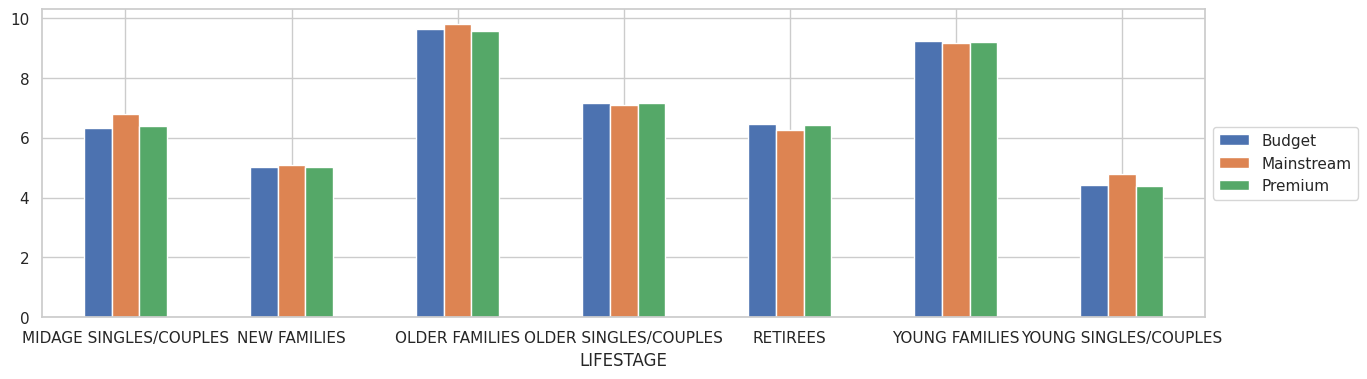

In [99]:

# Group by "LIFESTAGE" and "PREMIUM_CUSTOMER", calculate total quantity of products purchased and number of unique customers
average_purchase_quantity = (temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() /
                              temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique())

# Reshape the result for plotting
average_purchase_quantity_unstacked = average_purchase_quantity.unstack()

# Plotting the bar chart
average_purchase_quantity_unstacked.plot.bar(figsize=(15, 4), rot=0)

# Add legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Save the plot as a PNG image file
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

# Show the plot
plt.show()


In [100]:
#Average chips price per transaction by segments
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-100-d6be2ef3f3cb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)


Segment
YOUNG SINGLES/COUPLES - Mainstream     4.071485
MIDAGE SINGLES/COUPLES - Mainstream    4.000101
RETIREES - Budget                      3.924883
RETIREES - Premium                     3.921323
NEW FAMILIES - Budget                  3.919251
NEW FAMILIES - Mainstream              3.916581
OLDER SINGLES/COUPLES - Premium        3.887270
OLDER SINGLES/COUPLES - Budget         3.877022
NEW FAMILIES - Premium                 3.871743
RETIREES - Mainstream                  3.833343
OLDER SINGLES/COUPLES - Mainstream     3.803800
YOUNG FAMILIES - Budget                3.753659
MIDAGE SINGLES/COUPLES - Premium       3.752915
YOUNG FAMILIES - Premium               3.752402
OLDER FAMILIES - Budget                3.733344
MIDAGE SINGLES/COUPLES - Budget        3.728496
OLDER FAMILIES - Mainstream            3.727383
YOUNG FAMILIES - Mainstream            3.707097
OLDER FAMILIES - Premium               3.704625
YOUNG SINGLES/COUPLES - Premium        3.645518
YOUNG SINGLES/COUPLES - Budget  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-101-a5e9bed9050e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_unit_price = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack()


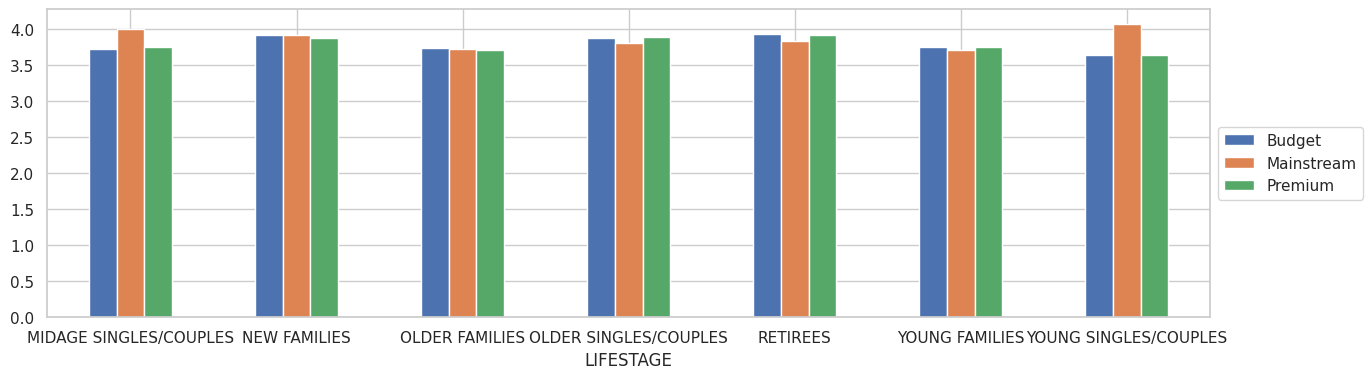

In [101]:
# Group by "LIFESTAGE" and "PREMIUM_CUSTOMER", calculate mean unit price and unstack for plotting
mean_unit_price = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack()

# Plotting the bar chart
mean_unit_price.plot.bar(figsize=(15, 4), rot=0)

# Add legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [102]:
z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-102-2ba250d5ab6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()


,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
12,YOUNG SINGLES/COUPLES - Mainstream,Doritos,18046.4
19,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
21,YOUNG SINGLES/COUPLES - Mainstream,Smiths,14644.3
53,YOUNG SINGLES/COUPLES - Mainstream,Old,8180.4
59,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
65,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
66,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
72,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,6693.6
83,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6



Report on Sales Trends and Insights

1. Trends and Insights:

Top 3 Total Sales Contributor Segments:

Older Families (Budget): $156,864

Young Singles/Couples (Mainstream): $147,582

Retirees (Premium): $145,169


Explanation: Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Premium), which explains their high total sales. Despite Older Families not having the highest population, they have the highest frequency of purchase, contributing to their high total sales. Additionally, Older Families followed by Young Families have the highest average quantity of chips bought per purchase.

Mainstream Young and Midage Singles/Couples:

This segment has the highest spending on chips per purchase compared to non-Mainstream counterparts, with a statistically significant difference.

Brand Preferences:

Kettle is the most dominating brand across all segments.
"Young and Midage Singles/Couples" segment has a different preference for Doritos as the 2nd most purchased brand compared to other segments.
Chip Size Preferences:

The most frequent chip size purchased across all segments is 175g, followed by the 150g chip size.


2. Views and Recommendations:

For Older Families (Budget):

Focus on the Budget segment due to frequent purchases and high quantity of chips bought per visit. Encourage more frequent purchases through targeted promotions.


For Young Singles/Couples (Mainstream):

Collaborate with Doritos to target this segment specifically, as they prefer Doritos as their 2nd most purchased brand. Ensure promotions reach this segment frequently due to their high population quantity.


For Retirees (Mainstream):

Focus on the Mainstream segment to capitalize on their high population quantity. Ensure promotions reach as many of them as possible and are frequent.
General Recommendations:

Leverage the popularity of Kettle as the most frequently purchased brand and the preference for 175g and 150g chip sizes when promoting chips across all segments.
By aligning promotions and marketing strategies with these insights, we can optimize sales and better serve the needs of each customer segment.